In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
from lyft_dataset_sdk.lyftdataset import LyftDataset
import matplotlib.pyplot as plt
from prepare_lyft_data import parse_train_csv,get_pc_in_image_fov,level5data,parse_string_to_box

/Users/kanhua/miniconda3/envs/lyft-3d/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/kanhua/miniconda3/envs/lyft-3d/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/kanhua/miniconda3/envs/lyft-3d/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/kanhua/miniconda3/envs/lyft-3d

Error occured when importing object classification models


In [3]:
import pickle

In [26]:
pred_file="/Users/kanhua/Dropbox/Programming/lyft-3d-main/train_val_pred.csv"

In [27]:
import pandas as pd
val_df=pd.read_csv(pred_file,index_col="Id")

In [28]:
val_df.head()

,PredictionString
Id,
24b0962e44420e6322de3f25d9e4e5cc3c7a348ec00bfa69db21517e4ca92cc8,-2.657545328140259 1019.8469574329433 1737.601...
c2ba18e4414ce9038ad52efab44e1a0a211ff1e6b297a632805000510756174d,-2.5117528438568115 1016.1520827421479 1693.27...
57c823209ea714288c2f56a3bf2510a9f02db43310ee3631a7d678b191645e12,-1.954171895980835 1007.1091951021189 1714.228...
29fd7d429450b8ac7478323ef9d5eede87fd184d74c3c36cd2e2853281043459,-0.15965664386749268 973.0266942269146 1695.06...
282b5aec05ed14275e0a7fb3f785c4cb4ad096a0faee0c5bf1d42122c646d194,-1.4732760190963745 1001.5903604278955 1763.51...


In [29]:
data_idx=1
sample_token=val_df.index[data_idx]
boxes_str=val_df.loc[sample_token,'PredictionString']

In [30]:
boxes=parse_string_to_box(boxes_str)

In [31]:
sample_record=level5data.get("sample",sample_token)

In [32]:
from skimage.io import imread

In [33]:
from prepare_lyft_data import transform_box_from_world_to_sensor_coordinates,get_train_data_sample_token_and_box

In [34]:
lidar_top_token=sample_record['data']['LIDAR_TOP']
lidar_path=level5data.get_sample_data_path(lidar_top_token)

In [35]:
from lyft_dataset_sdk.utils.data_classes import LidarPointCloud

In [36]:
lpc=LidarPointCloud.from_file(lidar_path)

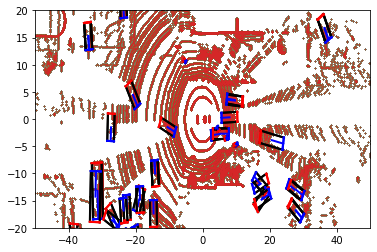

In [37]:
fig,ax=plt.subplots()
for pred_box in boxes:
    box_in_lidar_coord=transform_box_from_world_to_sensor_coordinates(pred_box,lidar_top_token,level5data)

    pts=lpc.points
    ax.scatter(pts[0,:],pts[1,:],s=0.1)
    ax.set_xlim([-50,50])
    ax.set_ylim([-20,20])
    view_mtx=np.eye(2)
    box_in_lidar_coord.render(ax,view=view_mtx)

In [61]:
sample_record['data']

{'LIDAR_FRONT_LEFT': '00a4b8a7a01e127cc151ba398a28235b59f12f3a82eabbf99a0f8e416554d471',
 'CAM_FRONT': '00ba71deb97524b5d9be9b677962b74bb32f89284ad7838462250218786b903e',
 'CAM_BACK': '8d614daa8d1d48d3af4a0c817b676da1cb3e68f1432296eb52cfc428d0ff4d6d',
 'CAM_BACK_LEFT': 'bf834842d4d30624d6fcf01b67701985e9ecc38b3072a4596ac2b8e288890f22',
 'LIDAR_TOP': 'b2fb6b275352ff1bc8d63cae2ec88561dddb044cae6f8e6ee7ada4ed07d79dc7',
 'CAM_FRONT_LEFT': '4613847aad336a132f937d2b6a9b183ddf3358fbea3743bf754bd90db1861d0a',
 'CAM_BACK_RIGHT': '923510cdc22d2f3ea244d816cac4c6057b68757bfbb01c4270b7f29dc0f7fe38',
 'LIDAR_FRONT_RIGHT': 'c9dfdcd012a4946eae21a83e52e45de09ca930621e7ca7c5b78503a73509fb31',
 'CAM_FRONT_ZOOMED': 'b39f82985328728fdd22c94777ccdb44693009e90ce4d35504f9fe403763185b',
 'CAM_FRONT_RIGHT': 'c25a458076be54c8c0eeea62e056115eeb5aaa55e6b7ed236e36b204ce985b6e'}

In [68]:
camera_token=sample_record['data']['CAM_BACK_LEFT']

In [69]:
camera_image_path,_,cam_intrinsic=level5data.get_sample_data(camera_token)

[ 972.72370042 1695.18370905  -23.79963846]
[1012.29233435 1707.72960526  -23.75269822]
[1005.247612   1713.75073309  -23.68336404]
[1000.36107792 1697.5867738   -23.30809811]
[1023.74060883 1679.30705104  -23.11158996]
[ 982.29340339 1695.95465212  -23.76786724]
[1008.90546945 1731.98191134  -23.71275505]
[1006.43523486 1734.40622259  -23.81796383]
[1011.05034938 1728.660959    -23.69393015]
[1034.57544343 1699.71488083  -23.64167006]
[1012.32109863 1707.71344526  -23.75851588]
[1019.21995492 1705.12313249  -23.71025689]
[1027.12143212 1702.31879837  -23.49090381]
[1006.29351797 1734.36696967  -23.84587224]
[ 972.90939935 1695.13322621  -23.80317682]
[ 968.42441195 1696.38516054  -23.96124069]
[ 971.78095544 1710.54201394  -23.40511703]
[ 982.33731002 1695.99213654  -23.82029443]


(1080, 0)

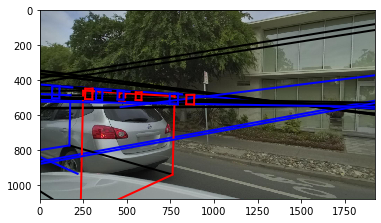

In [73]:
image_array=imread(camera_image_path)
fig,ax=plt.subplots()
ax.imshow(image_array)
for pred_box in boxes:
    if pred_box.score>-0.5 and pred_box.center[2]<-23.0:
        box_in_camera_coord=transform_box_from_world_to_sensor_coordinates(pred_box,camera_token,level5data)
        box_in_camera_coord.render(ax,view=cam_intrinsic,normalize=True)
        print(pred_box.center)
        

ax.set_xlim([0,image_array.shape[1]])
ax.set_ylim([image_array.shape[0],0])

## Show ground truth data

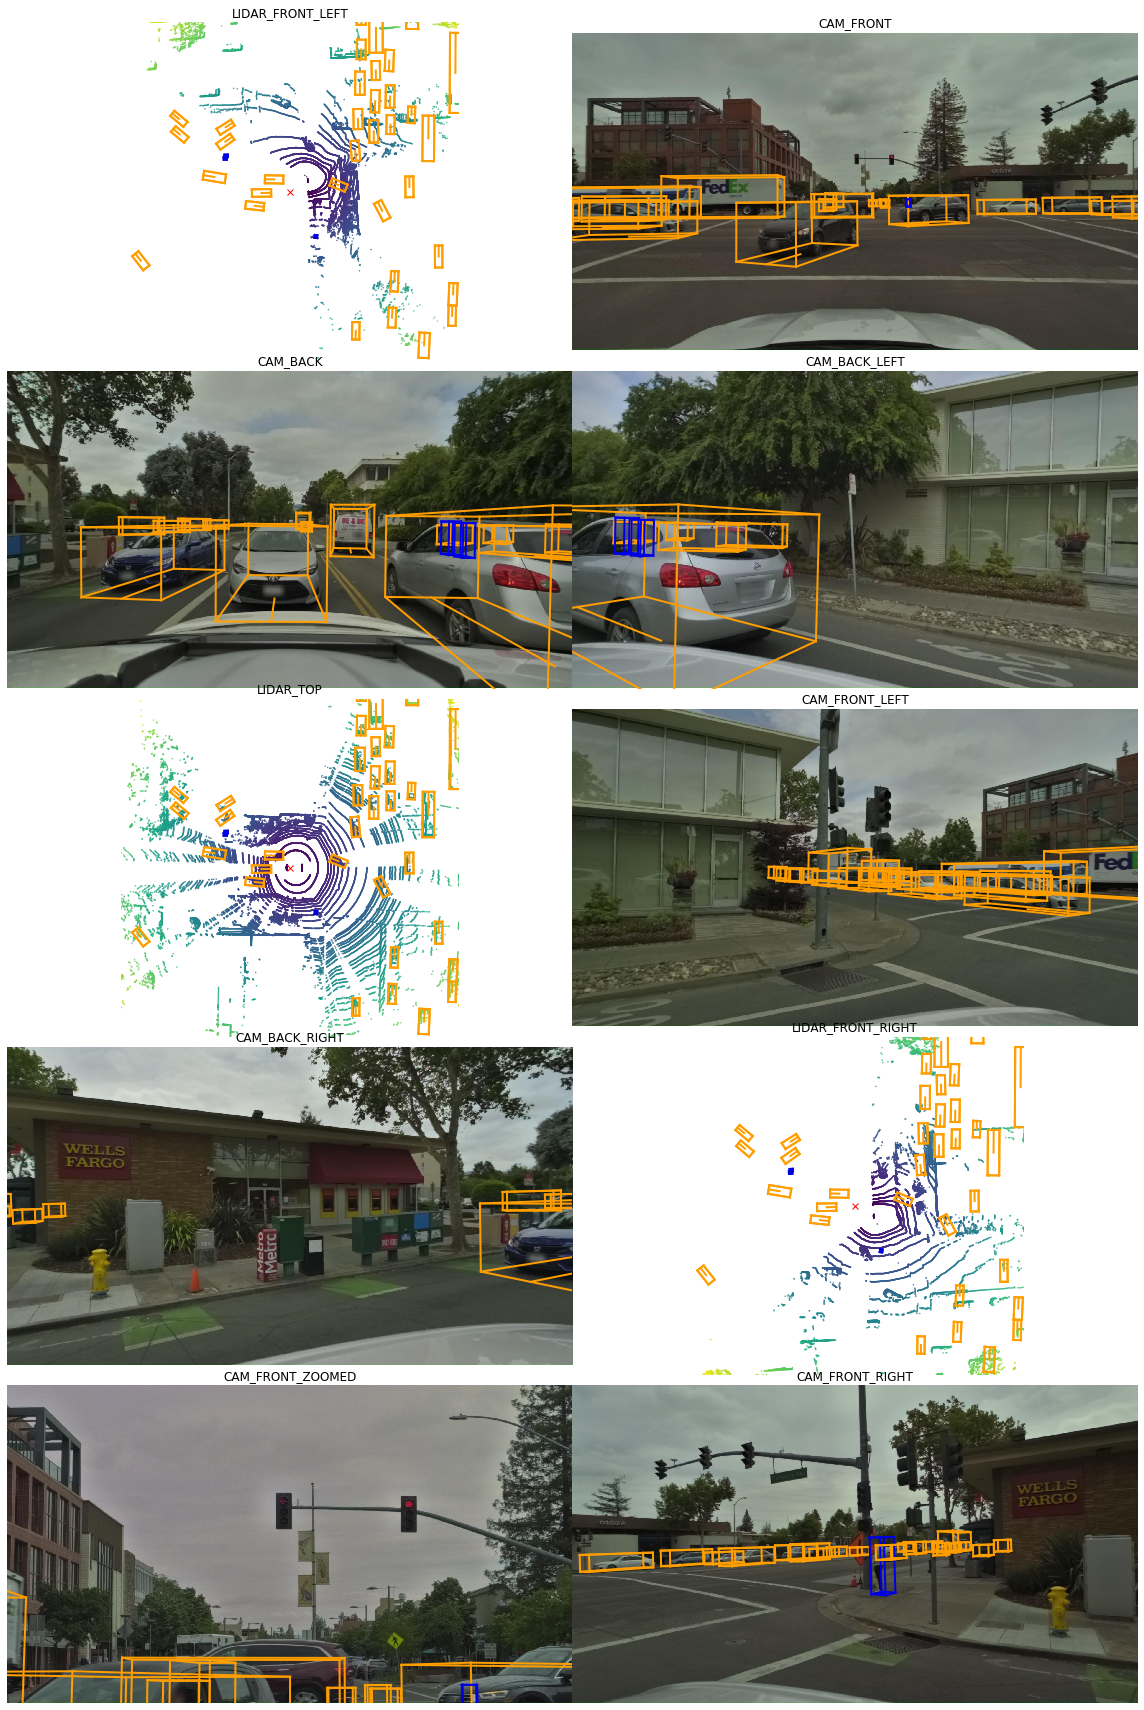

In [19]:
level5data.render_sample(sample_token=sample_token)

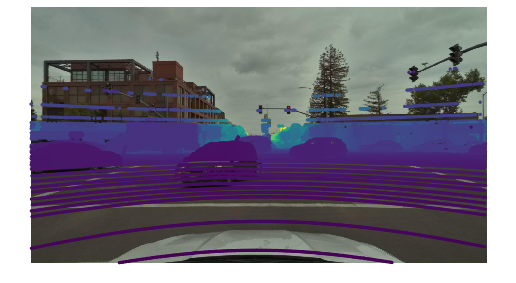

In [20]:
level5data.render_pointcloud_in_image(sample_token)

In [21]:
pred_obj.iloc[15,:]

NameError: name 'pred_obj' is not defined

In [ ]:
pred_obj.iloc[14,:]

In [ ]:
pred_obj.iloc[17,:]

In [ ]:
from object_classifier import TLClassifier
from vis_util import draw_bounding_boxes_on_image_array,draw_bounding_box_on_image_array

In [ ]:
tlc=TLClassifier()

In [ ]:
det_box=tlc.detect_multi_object(image_array,score_threshold=[0.6,0.6,0.6],rearrange_to_pointnet_convention=False)
det_box

In [ ]:
image_to_draw=np.copy(image_array)
det_box=det_box[:,0:4]
draw_bounding_boxes_on_image_array(image_to_draw,det_box)
plt.imshow(image_to_draw)

In [ ]:
det_box=tlc.detect_multi_object(image_array,score_threshold=[0.6,0.6,0.6],rearrange_to_pointnet_convention=True)
mask, pc_3d, pc_2d, lpc, img=get_pc_in_image_fov(lidar_top_token,'CAM_FRONT',level5testdata,bounding_box=det_box[1,0:4])

In [ ]:
pc_2d.shape

In [ ]:
fig,ax=plt.subplots()
ax.imshow(img)
ax.scatter(pc_2d[0,:],pc_2d[1,:])

In [ ]:
image_array.shape